In [1]:
import pandas as pd
from sklearn.feature_selection import SelectFdr, f_classif

from utils.norm_test import *
from utils.general import *
from utils.pre_process import *

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
data_path = catchPath('data/BankChurners.csv')
data_path

'/ML/data/BankChurners.csv'

In [4]:
data = pd.read_csv(data_path)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Data dictionary
1. CLIENTNUM: Client number. Unique identifier for the customer holding the account. Categorical nominal.
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary.
3. Customer_Age: Demographic variable - Customer's Age in Years. Numerical discrete.
4. Gender: Demographic variable - M=Male, F=Female. Categorical nominal.
5. Dependent_count: Demographic variable - Number of dependents. Numerical discrete.
6. Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.
7. Marital_Status: Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.
8. Income_Category: Demographic variable - Annual Income Category of the account holder (<
40K - 60K, 80K, 120K, >.). Categorical ordinal.
9. Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.
10. Months_on_book: Period of relationship with bank. Numerical discrete.
11. Total_Relationship_Count: Total no. of products held by the customer. Numerical discrete.
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months. Numerical discrete.
13. Contacts_Count_12_mon: No. of Contacts in the last 12 months. Numerical discrete.
14. Credit_Limit: Credit Limit on the Credit Card. Numerical continuous.
15. Total_Revolving_Bal: Total Revolving Balance on the Credit Card. Numerical discrete.
16. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months). Numerical continuous.
17. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1). Numerical continuous.
18. Total_Trans_Amt: Total Transaction Amount (Last 12 months). Numerical discrete.
19. Total_Trans_Ct: Total Transaction Count (Last 12 months). Numerical discrete.
20. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1). Numerical continuous.
21. Avg_Utilization_Ratio: Average Card Utilization Ratio. Numerical continuous.

In [5]:
data.shape

(10127, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### checking null values

In [7]:
data.isnull().any()

CLIENTNUM                                                                                                                             False
Attrition_Flag                                                                                                                        False
Customer_Age                                                                                                                          False
Gender                                                                                                                                False
Dependent_count                                                                                                                       False
Education_Level                                                                                                                       False
Marital_Status                                                                                                                        False
Income_Category     

In [8]:
#select columns
col = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [9]:
df = pd.DataFrame(data[col])
df.shape

(10127, 21)

## Checking duplicate values

In [10]:
df.duplicated().sum()

0

## creating a new column with the categorical variable churn_flag
if the account is closed then 1 else 0

In [11]:
df['attrition_flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,attrition_flag
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [12]:
df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_flag
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [13]:
#if the account is closed then 1 else 0
df['churn_flag'].value_counts()

churn_flag
0    8500
1    1627
Name: count, dtype: int64

In [15]:
SaveDataFrame(df,'data')

## Separating categorical and numerical variables

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_flag
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [ ]:
numerical_features = df.select_dtypes('number').columns.tolist()

In [ ]:
categorical_features = df.select_dtypes('object').columns.tolist()

To perform the paired statistical analysis, we chose the gender and age of the customers

In [ ]:
numerical_features.append('Gender')

In [ ]:
categorical_features.append('churn_flag')

In [ ]:
categorical_features.append('Customer_Age')

In [ ]:
categorical_features

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'churn_flag',
 'Customer_Age']

In [ ]:
numerical_features

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'churn_flag',
 'Gender']

In [ ]:
data_NUM = pd.DataFrame(df[numerical_features])

In [ ]:
data_NUM.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_flag,Gender
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,M
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,F
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,M
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,F
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,M


In [ ]:
data_CATG = pd.DataFrame(df[categorical_features])
data_CATG.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,churn_flag,Customer_Age
0,Existing Customer,M,High School,Married,$60K - $80K,Blue,0,45
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue,0,49
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,0,51
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue,0,40
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue,0,40


In [ ]:
#Salvar_planilha_dados_em_Data(data_NUM, 'numerical_features')
SaveDataFrame(data_NUM,'numerical_features')

In [ ]:
SaveDataFrame(data_CATG,'categorical_features')

## Select the parameters for the analysis

In [ ]:
col2 = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [ ]:
# Normalizing Data
X = norm_Data(data_NUM,col2)
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [ ]:
y = data_NUM['churn_flag'].values

In [ ]:
select = SelectFdr(f_classif, alpha = 0.05)

In [ ]:
X_new = select.fit(X, y)

In [ ]:
X_new.get_feature_names_out()

array(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype=object)

In [ ]:
len(X_new.get_feature_names_out())

10

In [ ]:
X.shape

(10127, 14)

In [ ]:
select2 = SelectFdr(f_classif, alpha = 0.01)

In [ ]:
X_new2 = select2.fit(X, y)

In [ ]:
X_new2.get_feature_names_out()

array(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype=object)

In [ ]:
len(X_new2.get_feature_names_out())

9

In [1]:
col3 = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [16]:
data_Num_path = catchPath('data/numerical_features.xlsx')

In [17]:
data_Num = pd.read_excel(data_Num_path)
data_Num.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_flag,Gender
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,M
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,F
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,M
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,F
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,M


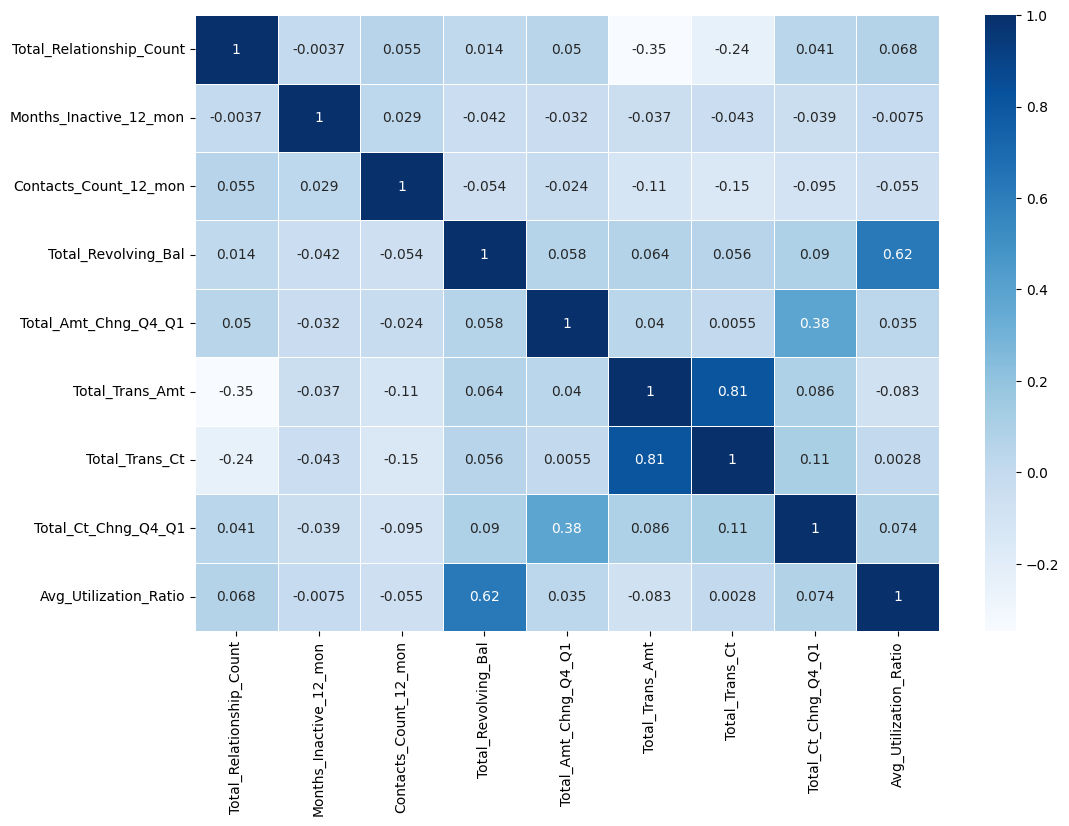

In [8]:
correlation_map(data_Num[col3], '')

In [9]:
col3

['Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Total_Revolving_Bal - Avg_Utilization_Ratio

Total_Amt_Chng_Q4_Q1 - Total_Ct_Chng_Q4_Q1

Total_Trans_Amt - Total_Trans_Ct

Total_Trans_Ct - Total_Ct_Chng_Q4_Q1

In [11]:
data_Num.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'churn_flag', 'Gender'],
      dtype='object')

In [12]:
features = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'churn_flag', 'Gender']

In [13]:
data_num_new = data_Num[features]
data_num_new.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag,Gender
0,5,1,3,1.335,42,0.061,0,M
1,6,1,2,1.541,33,0.105,0,F
2,4,1,0,2.594,20,0.000,0,M
3,3,4,1,1.405,20,0.760,0,F
4,5,1,0,2.175,28,0.000,0,M


In [ ]:
SaveDataFrame(data_num_new,'numerical_features_new_select')

In [19]:
data_num_new.columns

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio', 'churn_flag', 'Gender'],
      dtype='object')

### Calculating measures of central tendency

In [3]:
d_n = catchPath('data/numerical_features_new_select.xlsx')
d_n

'/ML/data/numerical_features_new_select.xlsx'

In [4]:
df_n = pd.read_excel(d_n)
df_n.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag,Gender
0,5,1,3,1.335,42,0.061,0,M
1,6,1,2,1.541,33,0.105,0,F
2,4,1,0,2.594,20,0.000,0,M
3,3,4,1,1.405,20,0.760,0,F
4,5,1,0,2.175,28,0.000,0,M


In [5]:
df_n['churn_flag'].value_counts()

churn_flag
0    8500
1    1627
Name: count, dtype: int64

#### As the classes are unbalanced, we will generate a sample with balanced classes to carry out our descriptive statistics analysis.

In [6]:
col_x = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio']

In [7]:
X = df_n[col_x]
X.shape

(10127, 6)

In [8]:
y = df_n['churn_flag']
y.shape

(10127,)

In [9]:
X_resampled, y_resampled = balances_categories(X, y)

In [10]:
X_resampled.shape

(3254, 6)

In [11]:
X_resampled.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
9581,2,1,3,0.710,104,0.039
6487,4,2,3,0.758,73,0.720
433,3,3,0,0.876,34,0.000
257,4,2,2,0.609,38,0.482
4713,3,3,4,0.672,77,0.000


In [12]:
y_resampled.value_counts()

churn_flag
0    1627
1    1627
Name: count, dtype: int64

In [13]:
y_resampled.shape

(3254,)

In [17]:
y_resampled

9581     0
6487     0
433      0
257      0
4713     0
        ..
10119    1
10123    1
10124    1
10125    1
10126    1
Name: churn_flag, Length: 3254, dtype: int64

In [14]:
df_balance = X_resampled.copy()

In [16]:
df_balance['churn_flag'] = y_resampled
df_balance.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag
9581,2,1,3,0.710,104,0.039,0
6487,4,2,3,0.758,73,0.720,0
433,3,3,0,0.876,34,0.000,0
257,4,2,2,0.609,38,0.482,0
4713,3,3,4,0.672,77,0.000,0


In [18]:
filter_0 = df_balance['churn_flag'] == 0

In [19]:
filter_1 = df_balance['churn_flag'] == 1

In [20]:
df_n_0 = df_balance[filter_0]
df_n_0.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag
9581,2,1,3,0.710,104,0.039,0
6487,4,2,3,0.758,73,0.720,0
433,3,3,0,0.876,34,0.000,0
257,4,2,2,0.609,38,0.482,0
4713,3,3,4,0.672,77,0.000,0


In [21]:
df_n_1 = df_balance[filter_1]
df_n_1.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag
21,2,3,3,1.047,16,0.000,1
39,5,4,3,1.052,16,0.077,1
51,2,3,1,0.997,19,0.562,1
54,1,3,3,1.041,15,0.000,1
61,2,4,4,0.763,15,0.000,1


In [22]:
df_n_1.shape

(1627, 7)

In [23]:
df_n_0.shape

(1627, 7)

In [24]:
col_n_mean = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio']

In [13]:
# 'Attrited Customer': 1, 'Existing Customer': 0

In [25]:
df_ac = df_n_1[col_n_mean]
df_ac.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
21,2,3,3,1.047,16,0.000
39,5,4,3,1.052,16,0.077
51,2,3,1,0.997,19,0.562
54,1,3,3,1.041,15,0.000
61,2,4,4,0.763,15,0.000


In [26]:
df_ec= df_n_0[col_n_mean]
df_ec.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
9581,2,1,3,0.710,104,0.039
6487,4,2,3,0.758,73,0.720
433,3,3,0,0.876,34,0.000
257,4,2,2,0.609,38,0.482
4713,3,3,4,0.672,77,0.000


In [27]:
ac_des = df_ac.describe()
ac_des

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
count,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,3.279656,2.693301,2.972342,0.694277,44.933620,0.162475
std,1.577782,0.899623,1.090537,0.214924,14.568429,0.264458
min,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.000000,2.000000,2.000000,0.544500,37.000000,0.000000
50%,3.000000,3.000000,3.000000,0.701000,43.000000,0.000000
75%,5.000000,3.000000,4.000000,0.856000,51.000000,0.231000
max,6.000000,6.000000,6.000000,1.492000,94.000000,0.999000


In [28]:
ec_des = df_ec.describe()
ec_des

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
count,1627.000000,1627.000000,1627.00000,1627.000000,1627.000000,1627.000000
mean,3.897972,2.263061,2.33866,0.771385,68.442532,0.290459
std,1.540168,1.016896,1.08959,0.215674,23.438325,0.274173
min,1.000000,0.000000,0.00000,0.276000,11.000000,0.000000
25%,3.000000,1.000000,2.00000,0.646500,52.500000,0.047500
50%,4.000000,2.000000,2.00000,0.742000,71.000000,0.208000
75%,5.000000,3.000000,3.00000,0.856000,83.000000,0.534500
max,6.000000,6.000000,5.00000,2.316000,134.000000,0.955000


In [29]:
ac_mean = ac_des.iloc[1]

In [30]:
AC_mean = make_dataframe(ac_mean,'mean', 'Attrited Customer')
AC_mean 

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
Attrited Customer,3.279656,2.693301,2.972342,0.694277,44.93362,0.162475


In [31]:
ec_mean = ec_des.iloc[1]

In [32]:
EC_mean = make_dataframe(ec_mean,'mean', 'Existing Customer')
EC_mean 

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
Existing Customer,3.897972,2.263061,2.33866,0.771385,68.442532,0.290459


In [33]:
frames = [AC_mean ,EC_mean]

In [34]:
result = pd.concat(frames)
result

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
Attrited Customer,3.279656,2.693301,2.972342,0.694277,44.933620,0.162475
Existing Customer,3.897972,2.263061,2.338660,0.771385,68.442532,0.290459


In [35]:
result['Class'] = result.index

In [36]:
result= result.reset_index()
result

,index,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,Class
0,Attrited Customer,3.279656,2.693301,2.972342,0.694277,44.933620,0.162475,Attrited Customer
1,Existing Customer,3.897972,2.263061,2.338660,0.771385,68.442532,0.290459,Existing Customer


In [37]:
del result['index']

In [38]:
result

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,Class
0,3.279656,2.693301,2.972342,0.694277,44.933620,0.162475,Attrited Customer
1,3.897972,2.263061,2.338660,0.771385,68.442532,0.290459,Existing Customer


In [39]:
SaveDataFrame(result,'result_mean')

### Hypothesis testing

First we will check the normality of the data

In [40]:
df_balance.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag
9581,2,1,3,0.710,104,0.039,0
6487,4,2,3,0.758,73,0.720,0
433,3,3,0,0.876,34,0.000,0
257,4,2,2,0.609,38,0.482,0
4713,3,3,4,0.672,77,0.000,0


In [41]:
df_balance.columns

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio', 'churn_flag'],
      dtype='object')

In [42]:
label = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio']

In [43]:
for l in label:
    r = dagostinho(df_balance[l].values,0.01)
    print(f"{l}: Test D'Agostinho = {r}")

Total_Relationship_Count: Test D'Agostinho = non-standard distribution
Months_Inactive_12_mon: Test D'Agostinho = non-standard distribution
Contacts_Count_12_mon: Test D'Agostinho = non-standard distribution
Total_Amt_Chng_Q4_Q1: Test D'Agostinho = non-standard distribution
Total_Trans_Ct: Test D'Agostinho = non-standard distribution
Avg_Utilization_Ratio: Test D'Agostinho = non-standard distribution


In [57]:
fig_gauss_path = catchPath('image/gauss_dist.png')
fig_gauss_path 

'/ML/image/gauss_dist.png'

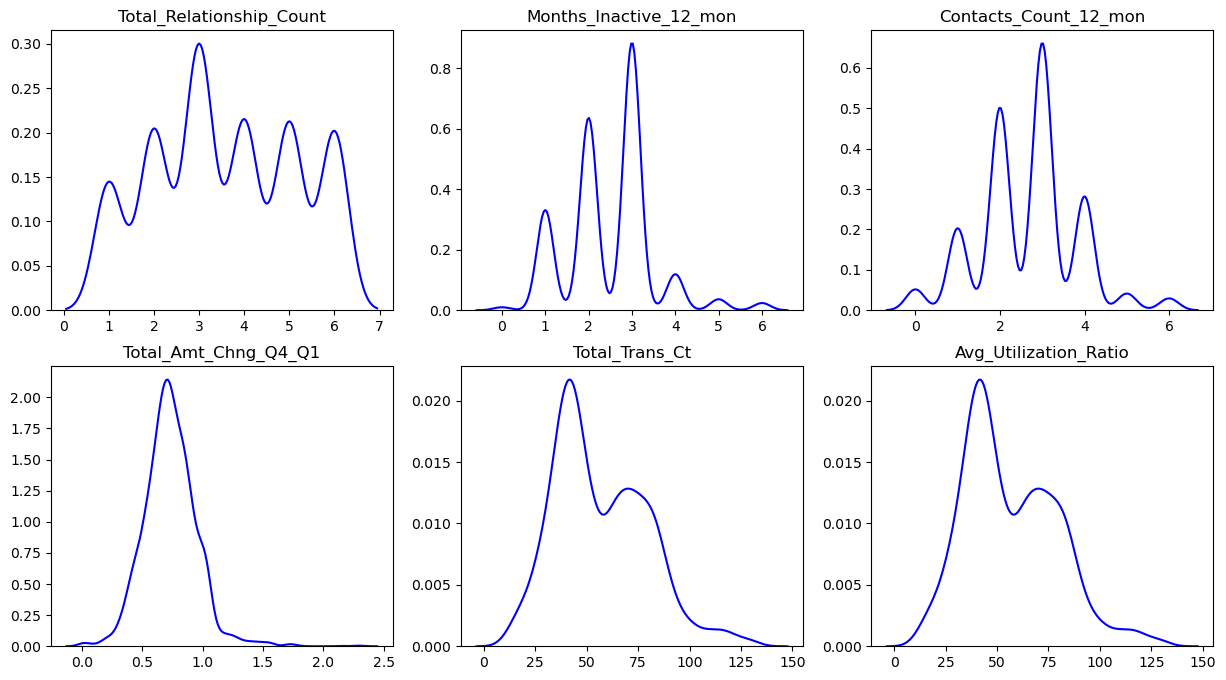

In [58]:
plt.figure(figsize=(15,8))
plt.figure(1)
plt.subplot(2,3,1)
sns.kdeplot(df_balance['Total_Relationship_Count'], color='blue').set(title='Total_Relationship_Count')
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,2)
sns.kdeplot(df_balance['Months_Inactive_12_mon'], color='blue').set(title='Months_Inactive_12_mon')
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,3)
sns.kdeplot(df_balance['Contacts_Count_12_mon'], color='blue').set(title='Contacts_Count_12_mon')
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,4)
sns.kdeplot(df_balance['Total_Amt_Chng_Q4_Q1'], color='blue').set(title='Total_Amt_Chng_Q4_Q1')
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,5)
sns.kdeplot(df_balance['Total_Trans_Ct'], color='blue').set(title='Total_Trans_Ct')
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,6)
sns.kdeplot(df_balance['Total_Trans_Ct'], color='blue').set(title='Avg_Utilization_Ratio')
plt.xlabel("")
plt.ylabel("")
plt.savefig(fig_gauss_path,dpi = 300)

In [49]:
for l in label:
    r, p = test_hipotesis_Wilcoxon(df_n_1[l],df_n_0[l],0.05)
    print(f"""
    {70*'='}
    Feature: {l} 
    {r}: value p= {p}
    {70*'='}
    """)


    Feature: Total_Relationship_Count 
    there is a significant difference: value p= 1.625916514213583e-26
    

    Feature: Months_Inactive_12_mon 
    there is a significant difference: value p= 4.967619762020583e-35
    

    Feature: Contacts_Count_12_mon 
    there is a significant difference: value p= 2.1312006924229946e-52
    

    Feature: Total_Amt_Chng_Q4_Q1 
    there is a significant difference: value p= 3.3982115655402484e-17
    

    Feature: Total_Trans_Ct 
    there is a significant difference: value p= 6.850336879747639e-158
    

    Feature: Avg_Utilization_Ratio 
    there is a significant difference: value p= 8.614074002601128e-43
    


#### The average values ​​found for each feature showed a significant difference between the evaluated classes with a p << 0.05

In [50]:
result

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,Class
0,3.279656,2.693301,2.972342,0.694277,44.933620,0.162475,Attrited Customer
1,3.897972,2.263061,2.338660,0.771385,68.442532,0.290459,Existing Customer
